nb con float 64 in sd*t si ha aumento di 10-20% tempi

in freq si ha guadagno 50% con 9 mesi, 20% con 1 mesi

in sd si ha guadagno 65% con modello ricerca 4096 (tfft 4096, 9mesi, 5hz)



In [3]:
import numpy

tempi1 = numpy.load('tempih/tempi1.npy')
tempi9 = numpy.load('tempih/tempi9.npy')
tempiSD = numpy.load('tempih/tempisd.npy')
tempien4 = numpy.load('tempih/tempien4.npy')
tempien8 = numpy.load('tempih/tempien8.npy')

pars1 = numpy.load('tempih/dimspar1.npy')
pars9 = numpy.load('tempih/dimspar9.npy')
parsSD = numpy.load('tempih/dimsparsd.npy')

#print(pars1,pars9)

<IPython.core.display.Javascript object>


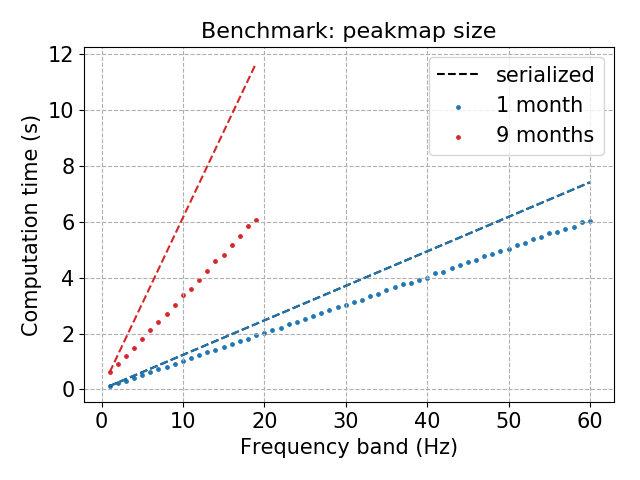

In [5]:
from matplotlib import pyplot
import matplotlib as mpl
import numpy
%matplotlib notebook
mpl.rcParams['font.size'] = 15
#pyplot.figure(figsize=(10, 8))

pyplot.grid(True, linestyle = '--')

a = pyplot.scatter(numpy.arange(1,tempi1.size),tempi1[1:],s=6,label= '1 month')

seriale1 = tempi1[1]*numpy.arange(1,tempi1.size)
a = pyplot.plot(numpy.arange(1,tempi1.size),seriale1,'--', color = 'black', label = 'serialized')

seriale1 = tempi1[1]*numpy.arange(1,tempi1.size)
a = pyplot.plot(numpy.arange(1,tempi1.size),seriale1,'--',)

a = pyplot.scatter(numpy.arange(1,20),tempi9[1:20],s = 6,color = 'C3',label='9 months')

seriale9 = tempi9[1]*numpy.arange(1,20)
a = pyplot.plot(numpy.arange(1,20),seriale9,'--',color = 'C3',)

pyplot.legend()
pyplot.title('Benchmark: peakmap size', fontsize = 16)
pyplot.xlabel('Frequency band (Hz)', fontsize = 15)
pyplot.ylabel('Computation time (s)', fontsize = 15)
#pyplot.savefig("benchfreqs.svg", format='svg')
pyplot.tight_layout()
pyplot.savefig("/home/protoss/Documenti/tesiarticol/thesis/img/cap3/benchfreqs.pdf", format='pdf')

<IPython.core.display.Javascript object>


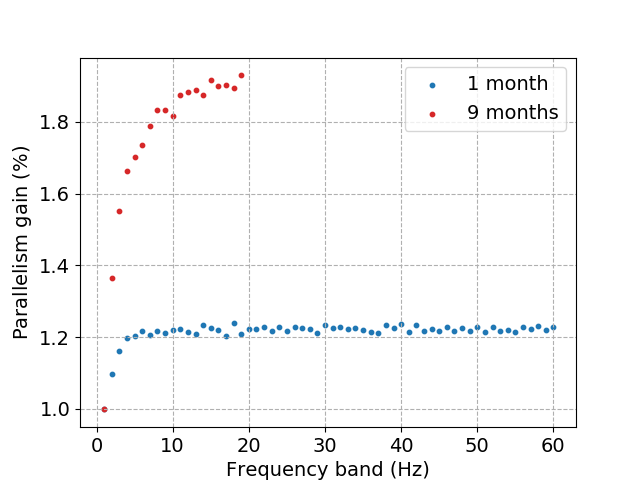

Text(0,0.5,'Parallelism gain $(\\%)$')

In [4]:
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib qt
#%matplotlib notebook
seriale1 = tempi1[1]*numpy.arange(1,tempi1.size)
seriale9 = tempi9[1]*numpy.arange(1,20)

#guadrel1 = (seriale1-tempi1[1:])/seriale1
#guadrel9 = (seriale9-tempi9[1:20])/seriale9
guadrel1 = seriale1/tempi1[1:]
guadrel9 = seriale9/tempi9[1:20]
#guadrel1 = (seriale1-tempi1[1:])/tempi1[1:]*100
#guadrel9 = (seriale9-tempi9[1:20])/tempi9[1:20]*100

pyplot.grid(True, linestyle = '--')
a = pyplot.scatter(numpy.arange(1,tempi1.size),guadrel1,s=10,label= '1 month')

a = pyplot.scatter(numpy.arange(1,20),guadrel9,s=10,color='C3',label='9 months')

pyplot.legend()
pyplot.xlabel('Frequency band (Hz)')
pyplot.ylabel('Parallelism gain $(\%)$')

<IPython.core.display.Javascript object>


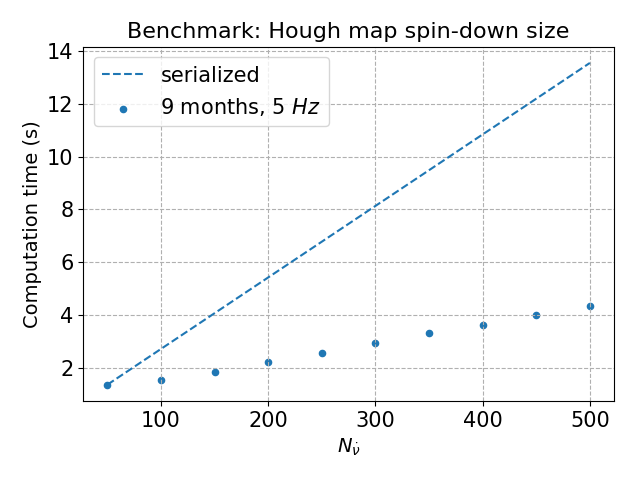

In [6]:
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib qt
#pyplot.figure(figsize=(10, 8))
a = pyplot.scatter(numpy.arange(50,501,50),tempiSD,s=20, label = '9 months, 5 $Hz$')
serialeSD = tempiSD[0]*numpy.arange(1,11)
#a = pyplot.plot(numpy.arange(50,501,50),serialeSD,'--',color = 'black', label = 'serialized')
a = pyplot.plot(numpy.arange(50,501,50),serialeSD,'--',label = 'serialized')
#pyplot.legend()
pyplot.grid(True, linestyle = '--')



pyplot.title('Benchmark: Hough map spin-down size', fontsize = 16)
pyplot.legend()
pyplot.xlabel('$N_{\dot{\\nu}}$', fontsize = 14)
pyplot.ylabel('Computation time (s)', fontsize = 14)
#pyplot.savefig("benchsd.svg", format='svg')
pyplot.tight_layout()
pyplot.savefig("/home/protoss/Documenti/tesiarticol/thesis/img/cap3/benchsd.pdf", format='pdf')

In [4]:
#%matplotlib qt
guadsd = (serialeSD[1:]/tempiSD[1:])
a = pyplot.scatter(numpy.arange(100,501,50),guadsd,s=10)



#pyplot.xlabel('Frequency band (Hz)')
#pyplot.ylabel('Parallelism gain $(\%)$')

In [6]:
from matplotlib import pyplot
%matplotlib qt
a = pyplot.scatter(numpy.arange(1,21),(tempien4[1:]-tempien4[1])/tempien4[1]*100, s=20,label = '$T_{FFT} = 4096$')
a = pyplot.scatter(numpy.arange(1,21),(tempien8[1:]-tempien8[1])/tempien8[1]*100,s=20,label = '$T_{FFT} = 8192$', color = 'C3')

#a = pyplot.scatter(numpy.arange(1,21),(tempien4[1:]), s=20,label = '$T_{FFT} = 4096$')
#a = pyplot.scatter(numpy.arange(1,21),(tempien8[1:]),s=20,label = '$T_{FFT} = 8192$', color = 'C3')

#serialeSD = tempiSD[0]*numpy.arange(1,11)
#a = pyplot.plot(numpy.arange(50,501,50),serialeSD)
pyplot.legend()
pyplot.title('Benchmark: Hough map frequency resolution')
pyplot.xlabel('enhancement')
pyplot.ylabel('$\Delta t/t\; (\%)$')